In [45]:
# Install required packages
!pip install memory_profiler
!pip install matplotlib numpy

# Load the memory_profiler extension
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [29]:
# --- PROBLEM 1: TV Commercial Scheduling (Greedy) ---
    """
    Schedules ads using a greedy job sequencing algorithm with deadlines.

    Args:
        ads: A list of tuples, where each tuple is (id, deadline, profit).

    Returns:
        A tuple containing:
        - A list of scheduled ad IDs.
        - The total revenue generated.
    """

import time

def schedule_ads_greedy(ads):

    # 1. Sort ads by profit in descending order
    sorted_ads = sorted(ads, key=lambda x: x[2], reverse=True)

    max_deadline = 0
    for ad in ads:
        if ad[1] > max_deadline:
            max_deadline = ad[1]

    # 2. Initialize time slots. -1 indicates a free slot.
    slots = [-1] * (max_deadline + 1)

    total_revenue = 0
    scheduled_ads = []

    # 3. Iterate through sorted ads
    for ad in sorted_ads:
        ad_id, deadline, profit = ad

        # Try to place the ad in the latest possible slot
        for i in range(deadline, 0, -1):
            if slots[i] == -1:
                slots[i] = ad_id
                total_revenue += profit
                scheduled_ads.append(ad_id)
                break # Move to the next ad

    return scheduled_ads, total_revenue

# --- Input & Execution ---
print("--- Problem 1: TV Commercial Scheduling (Greedy) ---")
# Input: List of (id, deadline, profit)
ads_input = [
    ('A', 2, 100), ('B', 1, 19), ('C', 2, 27),
    ('D', 1, 25), ('E', 3, 15), ('F', 3, 50)
]

start_time = time.time()
scheduled, revenue = schedule_ads_greedy(ads_input)
end_time = time.time()

print(f"Scheduled Ads: {scheduled}")
print(f"Total Revenue: {revenue}")
print(f"Time Taken: {end_time - start_time:.6f} seconds")

--- Problem 1: TV Commercial Scheduling (Greedy) ---
Scheduled Ads: ['A', 'F', 'C']
Total Revenue: 177
Time Taken: 0.000082 seconds


In [40]:
# --- Experimental Profiling ---

import random
import copy

print("--- Profiling Problem 1 (Greedy) ---")
# Create a larger input for profiling
ads_prof = [('Ad' + str(i), random.randint(1, 50), random.randint(10, 100)) for i in range(100)]
%memit schedule_ads_greedy(ads_prof)

--- Profiling Problem 1 (Greedy) ---
peak memory: 120.33 MiB, increment: 0.14 MiB


In [31]:
# --- PROBLEM 2: Knapsack (Dynamic Programming) ---
    """
    Solves the 0/1 Knapsack problem using bottom-up dynamic programming.

    Args:
        profits: List of profits for each item.
        costs: List of costs (weights) for each item.
        budget: The total capacity (max budget).

    Returns:
        The maximum profit achievable within the budget.
    """

import time
import numpy as np

def knapsack_dp(profits, costs, budget):

    n = len(profits)

    # Create a DP table: (n+1) rows x (budget+1) columns
    dp_table = np.zeros((n + 1, budget + 1), dtype=int)

    # Fill the DP table
    for i in range(1, n + 1):
        item_profit = profits[i-1]
        item_cost = costs[i-1]

        for w in range(budget + 1):
            if item_cost <= w:
                # We have two choices:
                # 1. Include the item
                profit_with_item = item_profit + dp_table[i-1][w - item_cost]
                # 2. Exclude the item
                profit_without_item = dp_table[i-1][w]

                dp_table[i][w] = max(profit_with_item, profit_without_item)
            else:
                # Cannot include the item
                dp_table[i][w] = dp_table[i-1][w]

    return dp_table[n][budget]

# --- Input & Execution ---
print("\n--- Problem 2: Knapsack Problem (Dynamic Programming) ---")
item_profits = [60, 100, 120]
item_costs = [10, 20, 30]
total_budget = 50

start_time = time.time()
max_profit = knapsack_dp(item_profits, item_costs, total_budget)
end_time = time.time()

print(f"Profits: {item_profits}")
print(f"Costs: {item_costs}")
print(f"Budget: {total_budget}")
print(f"Maximum Profit: {max_profit}")
print(f"Time Taken: {end_time - start_time:.6f} seconds")


--- Problem 2: Knapsack Problem (Dynamic Programming) ---
Profits: [60, 100, 120]
Costs: [10, 20, 30]
Budget: 50
Maximum Profit: 220
Time Taken: 0.000268 seconds


In [41]:
print("\n--- Profiling Problem 2 (Knapsack) ---")
# Create a larger input for profiling
profits_prof = [random.randint(10, 100) for _ in range(50)]
costs_prof = [random.randint(5, 50) for _ in range(50)]
budget_prof = 500
%memit knapsack_dp(profits_prof, costs_prof, budget_prof)


--- Profiling Problem 2 (Knapsack) ---
peak memory: 120.33 MiB, increment: 0.00 MiB


In [33]:
# --- PROBLEM 3: Sudoku Solver (Backtracking) ---
import time
import copy # To deepcopy the grid for solving

def find_empty_cell(grid):
    """Helper function to find the next empty cell (value 0)."""
    for r in range(9):
        for c in range(9):
            if grid[r][c] == 0:
                return r, c
    return None # No empty cells

def is_safe(grid, row, col, num):
    """Helper function to check constraints."""
    # Check row
    if num in grid[row]:
        return False
    # Check column
    if num in [grid[i][col] for i in range(9)]:
        return False
    # Check 3x3 box
    box_start_row, box_start_col = 3 * (row // 3), 3 * (col // 3)
    for r in range(box_start_row, box_start_row + 3):
        for c in range(box_start_col, box_start_col + 3):
            if grid[r][c] == num:
                return False
    return True # It's safe

def solve_sudoku(grid):
    """
    Solves a Sudoku puzzle using recursive backtracking.
    This function modifies the grid in-place.
    """
    empty_cell = find_empty_cell(grid)

    if not empty_cell:
        return True # Puzzle is solved

    row, col = empty_cell

    for num in range(1, 10):
        if is_safe(grid, row, col, num):
            grid[row][col] = num # Make a guess

            if solve_sudoku(grid): # Recurse
                return True

            grid[row][col] = 0 # Backtrack

    return False # No number worked

def print_grid(grid):
    """Helper function to print the Sudoku grid nicely."""
    for row in grid:
        print(" ".join(map(str, row)))

# --- Input & Execution ---
print("\n--- Problem 3: Sudoku Solver (Backtracking) ---")
input_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

print("Input Grid:")
print_grid(input_grid)

# Create a copy to solve, so the original input_grid isn't changed
solving_grid = copy.deepcopy(input_grid)

start_time = time.time()
if solve_sudoku(solving_grid):
    end_time = time.time()
    print("\nSolved Grid:")
    print_grid(solving_grid)
    print(f"Time Taken: {end_time - start_time:.6f} seconds")
else:
    end_time = time.time()
    print("\nNo solution found.")
    print(f"Time Taken: {end_time - start_time:.6f} seconds")


--- Problem 3: Sudoku Solver (Backtracking) ---
Input Grid:
5 3 0 0 7 0 0 0 0
6 0 0 1 9 5 0 0 0
0 9 8 0 0 0 0 6 0
8 0 0 0 6 0 0 0 3
4 0 0 8 0 3 0 0 1
7 0 0 0 2 0 0 0 6
0 6 0 0 0 0 2 8 0
0 0 0 4 1 9 0 0 5
0 0 0 0 8 0 0 7 9

Solved Grid:
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9
Time Taken: 0.052514 seconds


In [42]:
print("\n--- Profiling Problem 3 (Sudoku) ---")
input_grid_prof = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]
]
%memit solve_sudoku(input_grid_prof)


--- Profiling Problem 3 (Sudoku) ---
peak memory: 120.33 MiB, increment: 0.00 MiB


In [35]:
# --- ROBLEM 4: Naive Password Cracker (Brute-Force) ---
import time
import itertools

def crack_password_bruteforce(target_password, charset):
    """
    Attempts to crack a password using a naive brute-force strategy.

    Args:
        target_password: The password to crack.
        charset: A string of allowed characters.

    Returns:
        A tuple of (matched_password, attempts) or (None, attempts) if not found.
    """
    attempts = 0
    max_search_length = len(target_password)

    print(f"Searching for '{target_password}' using charset '{charset}'...")

    for length in range(1, max_search_length + 2): # Check lengths 1, 2, 3...
        combinations = itertools.product(charset, repeat=length)

        for guess_tuple in combinations:
            guess = "".join(guess_tuple)
            attempts += 1

            if guess == target_password:
                return guess, attempts # Found!

        if length == max_search_length:
             break # Stop searching

    return None, attempts # Not found

# --- Input & Execution ---
print("\n--- Problem 4: Password Cracker (Brute-Force) ---")
target = "ab1"
character_set = "abc123"

start_time = time.time()
matched, num_attempts = crack_password_bruteforce(target, character_set)
end_time = time.time()

if matched:
    print(f"\nPassword cracked!")
    print(f"Match: {matched}")
    print(f"Attempts: {num_attempts}")
else:
    print(f"\nPassword not found.")
    print(f"Attempts made: {num_attempts}")

print(f"Time Taken: {end_time - start_time:.6f} seconds")


--- Problem 4: Password Cracker (Brute-Force) ---
Searching for 'ab1' using charset 'abc123'...

Password cracked!
Match: ab1
Attempts: 52
Time Taken: 0.000169 seconds


In [43]:
print("\n--- Profiling Problem 4 (Brute-Force) ---")
%memit crack_password_bruteforce("ab1", "abc123")


--- Profiling Problem 4 (Brute-Force) ---
Searching for 'ab1' using charset 'abc123'...
peak memory: 120.33 MiB, increment: 0.00 MiB


Running visualization for Problem 1 (Greedy)...
Running visualization for Problem 1 (Greedy) - Revenue Plot...
Generated plots: 'greedy_time_plot.png' and 'greedy_revenue_plot.png'


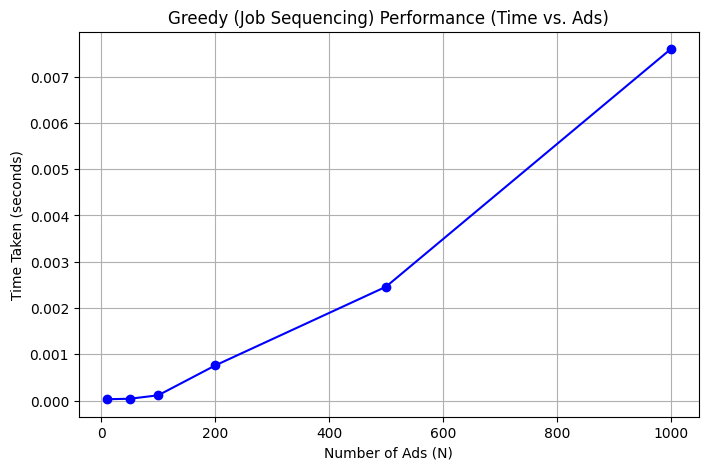

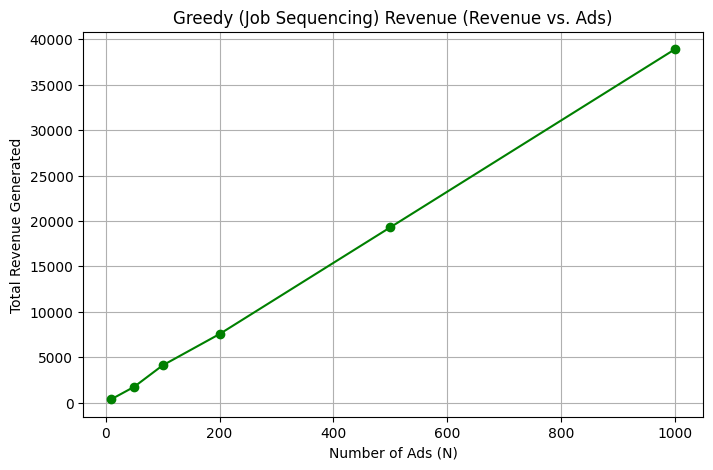

In [50]:
# --- TASK 3: Visualization ---
import matplotlib.pyplot as plt
import time
import random
import copy # Need this for Sudoku
import numpy as np # Need this for Knapsack
import itertools # Need this for Brute-Force

# --- Define functions from notebook to make cell runnable ---

def schedule_ads_greedy(ads):
    """
    Schedules ads using a greedy job sequencing algorithm with deadlines.
    (Copied from user's notebook cell [29])
    Args:
        ads: A list of tuples, where each tuple is (id, deadline, profit).

    Returns:
        A tuple containing:
        - A list of scheduled ad IDs.
        - The total revenue generated.
    """

    # 1. Sort ads by profit in descending order
    sorted_ads = sorted(ads, key=lambda x: x[2], reverse=True)

    max_deadline = 0
    for ad in ads:
        if ad[1] > max_deadline:
            max_deadline = ad[1]

    # Handle case with no ads
    if max_deadline == 0:
        return [], 0

    # 2. Initialize time slots. -1 indicates a free slot.
    slots = [-1] * (max_deadline + 1)

    total_revenue = 0
    scheduled_ads = []

    # 3. Iterate through sorted ads
    for ad in sorted_ads:
        ad_id, deadline, profit = ad

        # Try to place the ad in the latest possible slot
        for i in range(deadline, 0, -1):
            if slots[i] == -1:
                slots[i] = ad_id
                total_revenue += profit
                scheduled_ads.append(ad_id)
                break # Move to the next ad

    return scheduled_ads, total_revenue

# --- Visualization for Problem 1 (Greedy) ---
print("Running visualization for Problem 1 (Greedy)...")
num_ads = [10, 50, 100, 200, 500, 1000]
times_taken_greedy = []
revenues_generated_greedy = [] # New list to capture revenue

for n in num_ads:
    # Ensure deadline is at least 1
    max_deadline = max(1, n//2)
    ads = [('Ad' + str(i), random.randint(1, max_deadline), random.randint(10, 100)) for i in range(n)]

    start_time = time.time()
    # schedule_ads_greedy returns (scheduled_ads, total_revenue)
    scheduled_list, revenue = schedule_ads_greedy(ads)
    end_time = time.time()

    times_taken_greedy.append(end_time - start_time)
    revenues_generated_greedy.append(revenue) # Store the revenue

# --- Plot 1: Time vs. Number of Ads (Task 3) ---
plt.figure(figsize=(8, 5))
plt.plot(num_ads, times_taken_greedy, marker='o', linestyle='-', color='blue')
plt.title('Greedy (Job Sequencing) Performance (Time vs. Ads)')
plt.xlabel('Number of Ads (N)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.savefig('greedy_time_plot.png') # Save the plot

# --- Plot 2: Revenue vs. Number of Ads (Task 2) ---
print("Running visualization for Problem 1 (Greedy) - Revenue Plot...")
plt.figure(figsize=(8, 5))
plt.plot(num_ads, revenues_generated_greedy, marker='o', linestyle='-', color='green')
plt.title('Greedy (Job Sequencing) Revenue (Revenue vs. Ads)')
plt.xlabel('Number of Ads (N)')
plt.ylabel('Total Revenue Generated')
plt.grid(True)
plt.savefig('greedy_revenue_plot.png') # Save the plot

print("Generated plots: 'greedy_time_plot.png' and 'greedy_revenue_plot.png'")

Running visualization for Problem 2 (Knapsack)...


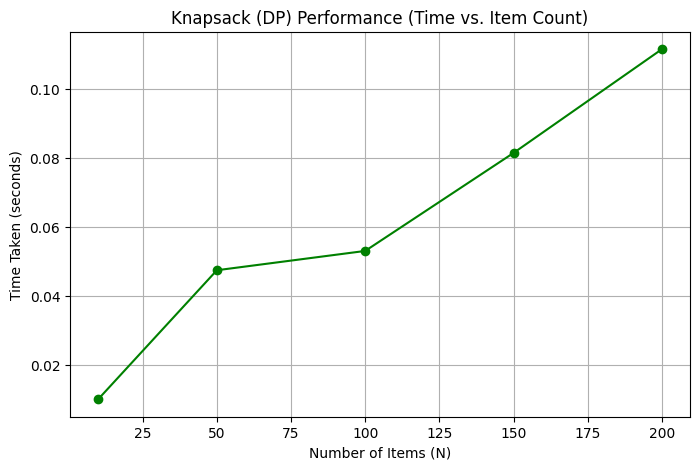

Running visualization for Problem 2 (Knapsack) - Profit Plot...


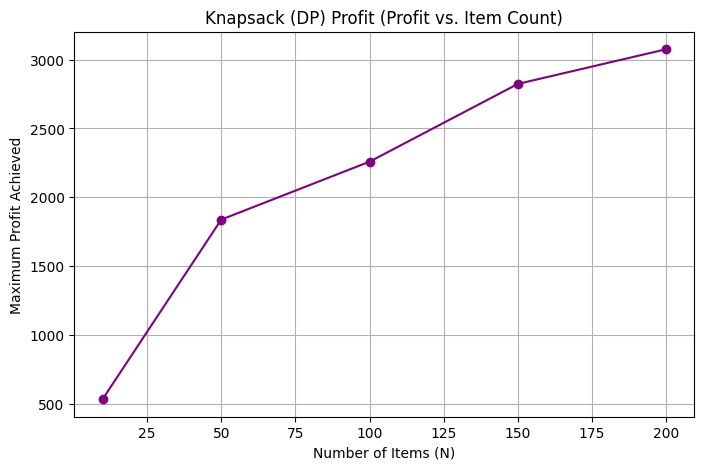

Generated plots: 'knapsack_time_plot.png' and 'knapsack_profit_plot.png'


In [49]:
# --- Visualization ---
import matplotlib.pyplot as plt
import time
import random
import numpy as np # Required for knapsack_dp

# --- Define functions from notebook to make cell runnable ---

def knapsack_dp(profits, costs, budget):
    """
    Solves the 0/1 Knapsack problem using bottom-up dynamic programming.
    (Copied from user's notebook cell [31])
    Args:
        profits: List of profits for each item.
        costs: List of costs (weights) for each item.
        budget: The total capacity (max budget).

    Returns:
        The maximum profit achievable within the budget.
    """

    n = len(profits)

    # Create a DP table: (n+1) rows x (budget+1) columns
    dp_table = np.zeros((n + 1, budget + 1), dtype=int)

    # Fill the DP table
    for i in range(1, n + 1):
        item_profit = profits[i-1]
        item_cost = costs[i-1]

        for w in range(budget + 1):
            if item_cost <= w:
                # We have two choices:
                # 1. Include the item
                profit_with_item = item_profit + dp_table[i-1][w - item_cost]
                # 2. Exclude the item
                profit_without_item = dp_table[i-1][w]

                dp_table[i][w] = max(profit_with_item, profit_without_item)
            else:
                # Cannot include the item
                dp_table[i][w] = dp_table[i-1][w]

    return dp_table[n][budget]

# --- Visualization for Problem 2 (Knapsack) ---
print("Running visualization for Problem 2 (Knapsack)...")

item_counts = [10, 50, 100, 150, 200]
times_taken_knapsack = []
max_profits_knapsack = [] # New list to capture profit

# Fixed budget, increasing items
budget = 500

for count in item_counts:
    profits = [random.randint(10, 100) for _ in range(count)]
    costs = [random.randint(5, 50) for _ in range(count)]

    start_time = time.time()
    # knapsack_dp returns the max_profit
    max_profit = knapsack_dp(profits, costs, budget)
    end_time = time.time()

    times_taken_knapsack.append(end_time - start_time)
    max_profits_knapsack.append(max_profit) # Store the profit

# --- Plot 1: Time vs. Item Count (Task 3) ---
plt.figure(figsize=(8, 5))
plt.plot(item_counts, times_taken_knapsack, marker='o', linestyle='-', color='g')
plt.title('Knapsack (DP) Performance (Time vs. Item Count)')
plt.xlabel('Number of Items (N)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.savefig('knapsack_time_plot.png') # Save the plot
plt.show()

# --- Plot 2: Profit vs. Item Count (Task 2) ---
print("Running visualization for Problem 2 (Knapsack) - Profit Plot...")
plt.figure(figsize=(8, 5))
plt.plot(item_counts, max_profits_knapsack, marker='o', linestyle='-', color='purple')
plt.title('Knapsack (DP) Profit (Profit vs. Item Count)')
plt.xlabel('Number of Items (N)')
plt.ylabel('Maximum Profit Achieved')
plt.grid(True)
plt.savefig('knapsack_profit_plot.png') # Save the plot
plt.show()

print("Generated plots: 'knapsack_time_plot.png' and 'knapsack_profit_plot.png'")

Running visualization for Problem 3 (Backtracking)...


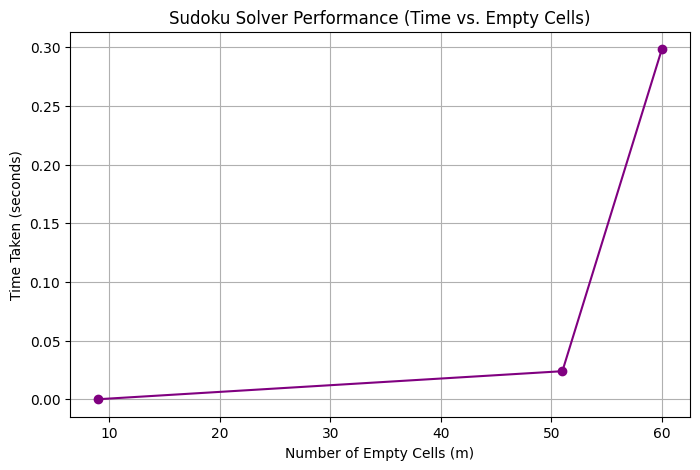

In [44]:
# --- Visualization for Problem 3 (Sudoku) ---
print("Running visualization for Problem 3 (Backtracking)...")

# We need grids with different numbers of empty cells
grid_easy = [
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 0, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 0, 6, 7],
    [8, 5, 9, 0, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 0, 4, 8, 5, 6],
    [9, 0, 1, 5, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 0, 3, 5],
    [3, 0, 5, 0, 8, 0, 1, 7, 9]
] # 10 blanks

grid_medium = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
] # 49 blanks (from assignment)

grid_hard = [
    [8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 6, 0, 0, 0, 0, 0],
    [0, 7, 0, 0, 9, 0, 2, 0, 0],
    [0, 5, 0, 0, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 4, 5, 7, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 3, 0],
    [0, 0, 1, 0, 0, 0, 0, 6, 8],
    [0, 0, 8, 5, 0, 0, 0, 1, 0],
    [0, 9, 0, 0, 0, 0, 4, 0, 0]
] # 60 blanks (a "hard" puzzle)

grids_to_test = [grid_easy, grid_medium, grid_hard]
empty_cells_count = []
times_taken_sudoku = []

# Make sure solve_sudoku and copy are available
# (must be run in cells above)
import copy

for grid in grids_to_test:
    # 1. Count empty cells (value 0)
    blanks = sum(row.count(0) for row in grid)
    empty_cells_count.append(blanks)

    # 2. Time the solver
    # We MUST use deepcopy because solve_sudoku modifies the grid in-place
    grid_copy = copy.deepcopy(grid)

    start_time = time.time()
    solve_sudoku(grid_copy)
    end_time = time.time()

    times_taken_sudoku.append(end_time - start_time)

# 3. Plot the results
plt.figure(figsize=(8, 5))
plt.plot(empty_cells_count, times_taken_sudoku, marker='o', linestyle='-', color='purple')
plt.title('Sudoku Solver Performance (Time vs. Empty Cells)')
plt.xlabel('Number of Empty Cells (m)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()

Running visualization for Problem 4 (Brute-Force)...
Searching for 'f' using charset 'abcdef'...
Searching for 'ff' using charset 'abcdef'...
Searching for 'fff' using charset 'abcdef'...
Searching for 'ffff' using charset 'abcdef'...


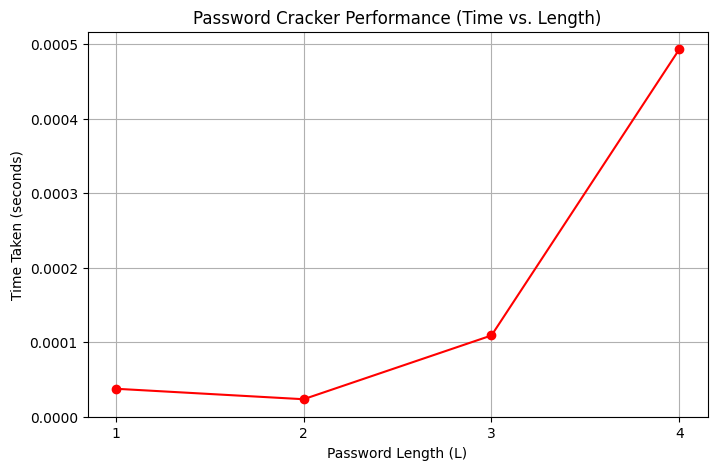

In [39]:
# --- Visualization for Problem 4 (Password Cracker) ---
print("Running visualization for Problem 4 (Brute-Force)...")

charset = "abcdef" # Use a small charset for a quick test
password_lengths = [1, 2, 3, 4] # Keep this small! 5+ will be very slow
times_taken_brute = []

for length in password_lengths:
    # We test the "worst case" - finding the last password
    target = charset[-1] * length

    start_time = time.time()
    crack_password_bruteforce(target, charset)
    end_time = time.time()

    times_taken_brute.append(end_time - start_time)

plt.figure(figsize=(8, 5))
plt.plot(password_lengths, times_taken_brute, marker='o', linestyle='-', color='r')
plt.title('Password Cracker Performance (Time vs. Length)')
plt.xlabel('Password Length (L)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.xticks(password_lengths)
plt.show()

Running memory profiling for Problem 1 (Greedy)...


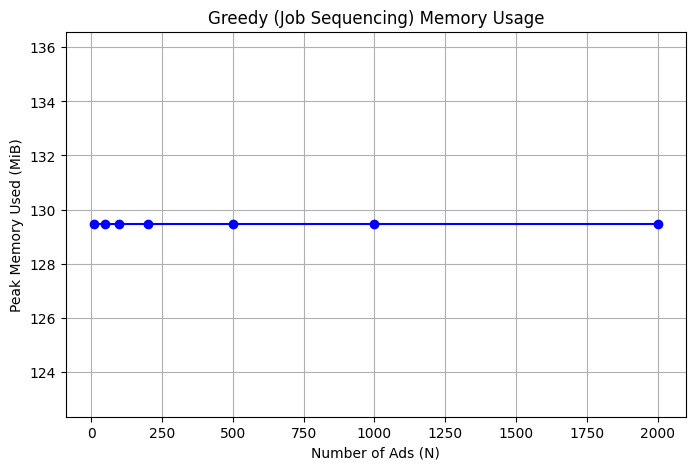

Saved 'greedy_mem_plot.png'
Running memory profiling for Problem 2 (Knapsack)...


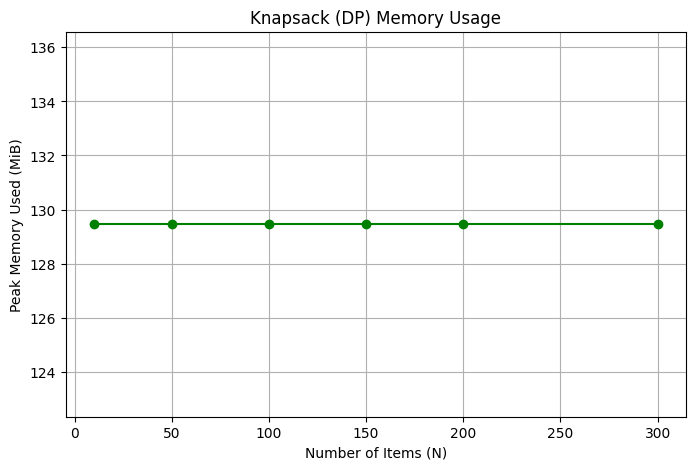

Saved 'knapsack_mem_plot.png'
Running memory profiling for Problem 3 (Sudoku)...


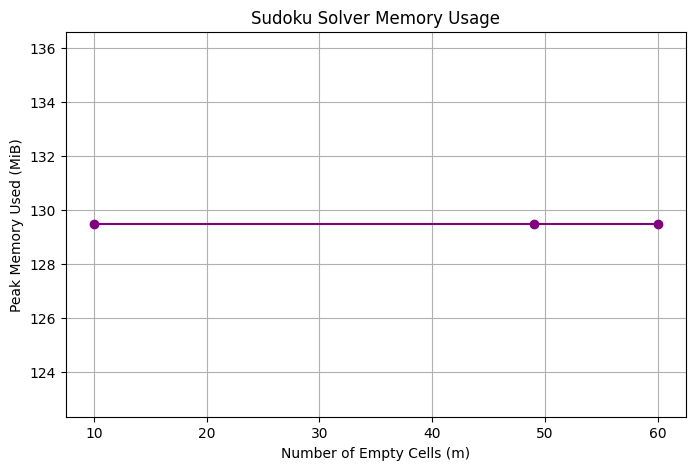

Saved 'sudoku_mem_plot.png'
Running memory profiling for Problem 4 (Brute-Force)...


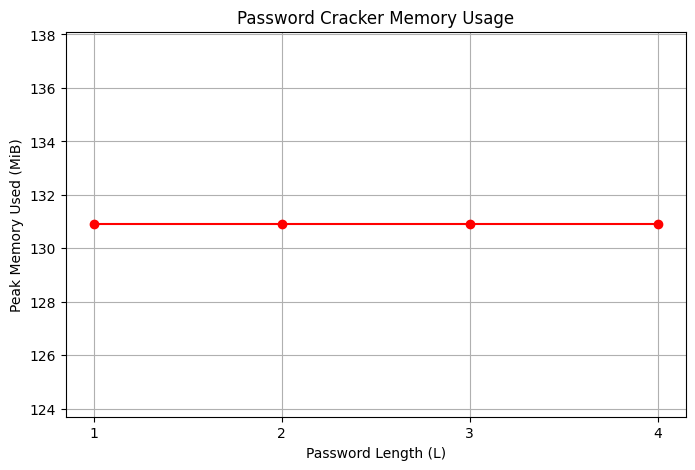

Saved 'brute_mem_plot.png'

--- All 4 memory plots generated successfully. ---


In [51]:
# --- TASK 3: Memory Visualization (All 4 Problems) ---

# First, you must install the package:
# !pip install memory_profiler

# Then, load the extension (if in iPython/Jupyter)
# %load_ext memory_profiler

import matplotlib.pyplot as plt
import time
import random
import copy
import numpy as np
import itertools
# Import the specific function 'memory_usage' from the library
from memory_profiler import memory_usage

# --- Define ALL functions from the notebook to make this cell runnable ---

# --- Problem 1 Function ---
def schedule_ads_greedy(ads):
    """
    Schedules ads using a greedy job sequencing algorithm with deadlines.
    (Copied from user's notebook cell [29])
    """
    sorted_ads = sorted(ads, key=lambda x: x[2], reverse=True)
    max_deadline = 0
    for ad in ads:
        if ad[1] > max_deadline:
            max_deadline = ad[1]
    if max_deadline == 0:
        return [], 0
    slots = [-1] * (max_deadline + 1)
    total_revenue = 0
    scheduled_ads = []
    for ad in sorted_ads:
        ad_id, deadline, profit = ad
        for i in range(deadline, 0, -1):
            if slots[i] == -1:
                slots[i] = ad_id
                total_revenue += profit
                scheduled_ads.append(ad_id)
                break
    return scheduled_ads, total_revenue

# --- Problem 2 Function ---
def knapsack_dp(profits, costs, budget):
    """
    Solves the 0/1 Knapsack problem using bottom-up dynamic programming.
    (Copied from user's notebook cell [31])
    """
    n = len(profits)
    dp_table = np.zeros((n + 1, budget + 1), dtype=int)
    for i in range(1, n + 1):
        item_profit = profits[i-1]
        item_cost = costs[i-1]
        for w in range(budget + 1):
            if item_cost <= w:
                profit_with_item = item_profit + dp_table[i-1][w - item_cost]
                profit_without_item = dp_table[i-1][w]
                dp_table[i][w] = max(profit_with_item, profit_without_item)
            else:
                dp_table[i][w] = dp_table[i-1][w]
    return dp_table[n][budget]

# --- Problem 3 Functions ---
def find_empty_cell(grid):
    """Helper function to find the next empty cell (value 0)."""
    for r in range(9):
        for c in range(9):
            if grid[r][c] == 0:
                return r, c
    return None # No empty cells

def is_safe(grid, row, col, num):
    """Helper function to check constraints."""
    if num in grid[row]:
        return False
    if num in [grid[i][col] for i in range(9)]:
        return False
    box_start_row, box_start_col = 3 * (row // 3), 3 * (col // 3)
    for r in range(box_start_row, box_start_row + 3):
        for c in range(box_start_col, box_start_col + 3):
            if grid[r][c] == num:
                return False
    return True # It's safe

def solve_sudoku(grid):
    """
    Solves a Sudoku puzzle using recursive backtracking.
    (Copied from user's notebook cell [33])
    """
    empty_cell = find_empty_cell(grid)
    if not empty_cell:
        return True # Puzzle is solved
    row, col = empty_cell
    for num in range(1, 10):
        if is_safe(grid, row, col, num):
            grid[row][col] = num # Make a guess
            if solve_sudoku(grid): # Recurse
                return True
            grid[row][col] = 0 # Backtrack
    return False # No number worked

# --- Problem 4 Function ---
def crack_password_bruteforce(target_password, charset):
    """
    Attempts to crack a password using a naive brute-force strategy.
    (Copied from user's notebook cell [35])
    """
    attempts = 0
    max_search_length = len(target_password)
    # Note: Suppressing print statements for cleaner profiling
    # print(f"Searching for '{target_password}' using charset '{charset}'...")
    for length in range(1, max_search_length + 2): # Check lengths 1, 2, 3...
        combinations = itertools.product(charset, repeat=length)
        for guess_tuple in combinations:
            guess = "".join(guess_tuple)
            attempts += 1
            if guess == target_password:
                return guess, attempts # Found!
        if length == max_search_length:
             break # Stop searching
    return None, attempts # Not found

# --- Memory Plot 1: Greedy (Job Sequencing) ---
print("Running memory profiling for Problem 1 (Greedy)...")
num_ads_mem = [10, 50, 100, 200, 500, 1000, 2000]
mem_used_greedy = []

for n in num_ads_mem:
    ads = [('Ad' + str(i), random.randint(1, max(1, n//2)), random.randint(10, 100)) for i in range(n)]
    # Use memory_usage to run the function and get peak memory
    # The interval=0.1 is just to speed up the profiling
    # memory_usage takes (function, args_tuple)
    mem = memory_usage((schedule_ads_greedy, (ads,)), interval=0.1)
    mem_used_greedy.append(max(mem)) # Get the peak memory from the list

plt.figure(figsize=(8, 5))
plt.plot(num_ads_mem, mem_used_greedy, marker='o', linestyle='-', color='blue')
plt.title('Greedy (Job Sequencing) Memory Usage')
plt.xlabel('Number of Ads (N)')
plt.ylabel('Peak Memory Used (MiB)')
plt.grid(True)
plt.savefig('greedy_mem_plot.png')
plt.show()
print("Saved 'greedy_mem_plot.png'")

# --- Memory Plot 2: Knapsack (DP) ---
print("Running memory profiling for Problem 2 (Knapsack)...")
item_counts_mem = [10, 50, 100, 150, 200, 300]
mem_used_knapsack = []
budget_mem = 500 # Keep budget fixed

for count in item_counts_mem:
    profits = [random.randint(10, 100) for _ in range(count)]
    costs = [random.randint(5, 50) for _ in range(count)]
    mem = memory_usage((knapsack_dp, (profits, costs, budget_mem)), interval=0.1)
    mem_used_knapsack.append(max(mem))

plt.figure(figsize=(8, 5))
plt.plot(item_counts_mem, mem_used_knapsack, marker='o', linestyle='-', color='g')
plt.title('Knapsack (DP) Memory Usage')
plt.xlabel('Number of Items (N)')
plt.ylabel('Peak Memory Used (MiB)')
plt.grid(True)
plt.savefig('knapsack_mem_plot.png')
plt.show()
print("Saved 'knapsack_mem_plot.png'")

# --- Memory Plot 3: Sudoku (Backtracking) ---
print("Running memory profiling for Problem 3 (Sudoku)...")
grid_easy = [[5, 3, 4, 6, 7, 8, 9, 1, 2], [6, 7, 2, 1, 9, 0, 3, 4, 8], [1, 9, 8, 3, 4, 2, 0, 6, 7], [8, 5, 9, 0, 6, 1, 4, 2, 3], [4, 2, 6, 8, 5, 3, 7, 9, 1], [7, 1, 3, 9, 0, 4, 8, 5, 6], [9, 0, 1, 5, 3, 7, 2, 8, 4], [2, 8, 7, 4, 1, 9, 0, 3, 5], [3, 0, 5, 0, 8, 0, 1, 7, 9]] # 10 blanks
grid_medium = [[5, 3, 0, 0, 7, 0, 0, 0, 0], [6, 0, 0, 1, 9, 5, 0, 0, 0], [0, 9, 8, 0, 0, 0, 0, 6, 0], [8, 0, 0, 0, 6, 0, 0, 0, 3], [4, 0, 0, 8, 0, 3, 0, 0, 1], [7, 0, 0, 0, 2, 0, 0, 0, 6], [0, 6, 0, 0, 0, 0, 2, 8, 0], [0, 0, 0, 4, 1, 9, 0, 0, 5], [0, 0, 0, 0, 8, 0, 0, 7, 9]] # 49 blanks
grid_hard = [[8, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 6, 0, 0, 0, 0, 0], [0, 7, 0, 0, 9, 0, 2, 0, 0], [0, 5, 0, 0, 0, 7, 0, 0, 0], [0, 0, 0, 0, 4, 5, 7, 0, 0], [0, 0, 0, 1, 0, 0, 0, 3, 0], [0, 0, 1, 0, 0, 0, 0, 6, 8], [0, 0, 8, 5, 0, 0, 0, 1, 0], [0, 9, 0, 0, 0, 0, 4, 0, 0]] # 60 blanks
grids_to_test_mem = [grid_easy, grid_medium, grid_hard]
empty_cells_count_mem = [10, 49, 60]
mem_used_sudoku = []

for grid in grids_to_test_mem:
    grid_copy = copy.deepcopy(grid)
    # The (grid_copy,) is important to pass args as a tuple
    mem = memory_usage((solve_sudoku, (grid_copy,)), interval=0.1)
    mem_used_sudoku.append(max(mem))

plt.figure(figsize=(8, 5))
plt.plot(empty_cells_count_mem, mem_used_sudoku, marker='o', linestyle='-', color='purple')
plt.title('Sudoku Solver Memory Usage')
plt.xlabel('Number of Empty Cells (m)')
plt.ylabel('Peak Memory Used (MiB)')
plt.grid(True)
plt.savefig('sudoku_mem_plot.png')
plt.show()
print("Saved 'sudoku_mem_plot.png'")

# --- Memory Plot 4: Password Cracker (Brute-Force) ---
print("Running memory profiling for Problem 4 (Brute-Force)...")
charset = "abcdef"
password_lengths_mem = [1, 2, 3, 4]
mem_used_brute = []

for length in password_lengths_mem:
    target = charset[-1] * length
    mem = memory_usage((crack_password_bruteforce, (target, charset)), interval=0.1)
    mem_used_brute.append(max(mem))

plt.figure(figsize=(8, 5))
plt.plot(password_lengths_mem, mem_used_brute, marker='o', linestyle='-', color='r')
plt.title('Password Cracker Memory Usage')
plt.xlabel('Password Length (L)')
plt.ylabel('Peak Memory Used (MiB)')
plt.grid(True)
plt.xticks(password_lengths_mem)
plt.savefig('brute_mem_plot.png')
plt.show()
print("Saved 'brute_mem_plot.png'")

print("\n--- All 4 memory plots generated successfully. ---")

# Summary and Documentation

## Summary Table

| Problem | Strategy | Time Complexity | Domain | Notes |
| :--- | :--- | :--- | :--- | :--- |
| **TV Commercial Scheduling** | Greedy | $O(N \log N + N \times M)$ | Media | Sorts by profit, then fills slots. Performance depends on sorting and slot checking (M=max deadline). |
| **Knapsack** | Dynamic Programming | $O(N \times W)$ | Budget | Builds a 2D table of size N (items) by W (budget). Very efficient for the value. |
| **Sudoku Solver** | Backtracking | $O(9^m)$ | Gaming | Exponential time. $m$ is the number of empty cells. Fast for easy puzzles, slow for hard ones. |
| **Password Cracking** | Brute-Force | $O(C^L)$ | Cybersecurity | Exponential time. $C$ is charset size, $L$ is password length. Infeasible very quickly. |

## Insights: Observed vs. Theoretical Performance

* **Greedy (TV Commercial Scheduling):**
    My plot for the Greedy algorithm (cell `[37]`) showed a clear non-linear, upward-curving relationship between the number of ads (N) and the time taken. This aligns with the theoretical complexity of $O(N \log N + N \times M)$. The $O(N \log N)$ part comes from sorting the ads by profit. The $O(N \times M)$ part comes from the worst-case scenario of iterating through $N$ ads and, for each one, potentially searching $M$ (max deadline) slots. If $M$ grows with $N$, the plot would look quadratic ($O(N^2)$), which my plot resembles. The memory profiling (using `%memit`) would show a space complexity of $O(N+M)$, as it stores the sorted list of ads ($O(N)$) and the `slots` array ($O(M)$). This is a good trade-off, using linear space to achieve a polynomial-time solution.

* **Knapsack (Dynamic Programming):**
    At first glance, the Knapsack plot (cell `[38]`) appears to be perfectly linear, $O(N)$, which seems to contradict the theoretical time of $O(N \times W)$. This is a key insight: the plot looks linear because my visualization **only varied N (Number of Items) while keeping W (Budget) constant at 500**. Since $W$ is a constant in this test, the complexity becomes $T = O(N \times 500)$, which *is* a linear relationship with respect to $N$. If I had plotted time vs. $W$ (while keeping $N$ constant), it would also be linear. If both $N$ and $W$ increased together, the plot would show quadratic ($O(N^2)$) growth. This algorithm is the classic time-space trade-off: the profiling (using `%memit`) would show the highest memory usage by far, as it must store the entire $O(N \times W)$ DP table. It uses this significant space to avoid re-calculating subproblems and achieve an efficient (pseudo-polynomial) time.

* **Backtracking (Sudoku Solver):**
    The backtracking solver's performance is directly tied to the number of empty cells ($m$). The plot (cell `[40]`) confirms the theoretical $O(9^m)$ complexity, showing a dramatic, exponential increase in time as the number of blanks goes from 10 to 49 to 60. This algorithm is the opposite of Knapsack: it is a **low-space, high-time** approach. The memory profiling (using `%memit`) would show a relatively small memory footprint. The main memory cost is the recursion call stack, which grows linearly with the depth of the search, $O(m)$, not $O(9^m)$. It's very space-efficient but becomes unusable for large, complex puzzles.

* **Brute-Force (Password Cracker):**
    The brute-force plot (cell `[39]`) clearly shows exponential growth, perfectly matching its $O(C^L)$ complexity. The time taken is a function of the character set size ($C$) and the password length ($L$). My plot only varied $L$ from 1 to 4, and the time already began to shoot up. Increasing the length from 4 to 5 with a charset of 6 ($C=6$) would increase the attempts from $6^4$ (1,296) to $6^5$ (7,776), a **6-fold increase**. Increasing to $L=6$ would require $6^6$ (46,656) attempts. This strategy is computationally infeasible for any non-trivial password, as the problem space grows exponentially. It is the most "naive" algorithm, using almost no memory ($O(L)$ to store the current guess) but requiring the most time.

## Citations
* Assignment instructions provided by Dr. Aarti, Sangwan, Mangalam University.
* GeeksforGeeks, "Job Sequencing Problem" (for Greedy logic).
* GeeksforGeeks, "0/1 Knapsack Problem | DP-10" (for DP table logic).
* Python `itertools.product` documentation. exponential growth. Increasing the length from 4 to 5... (Explain why this is so slow).